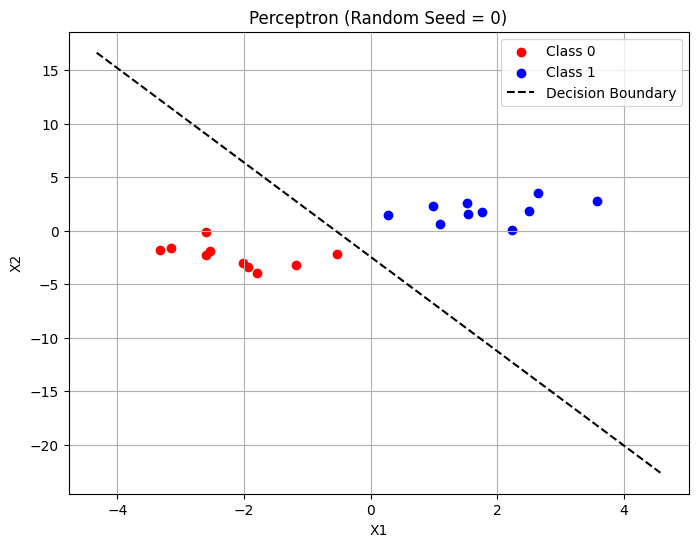

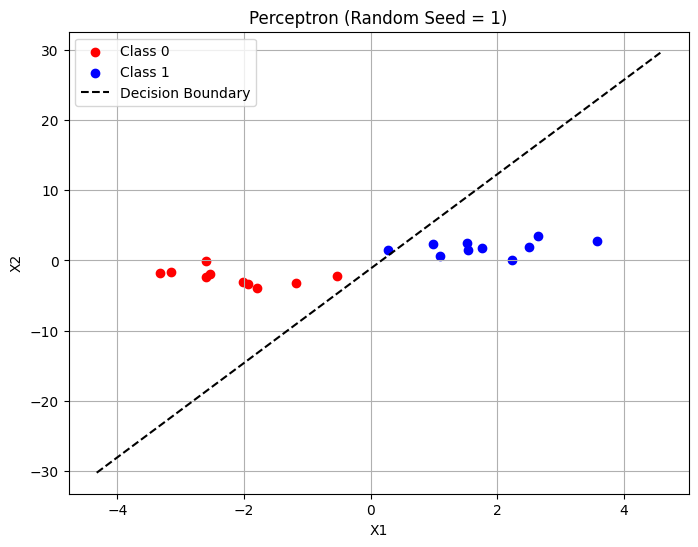

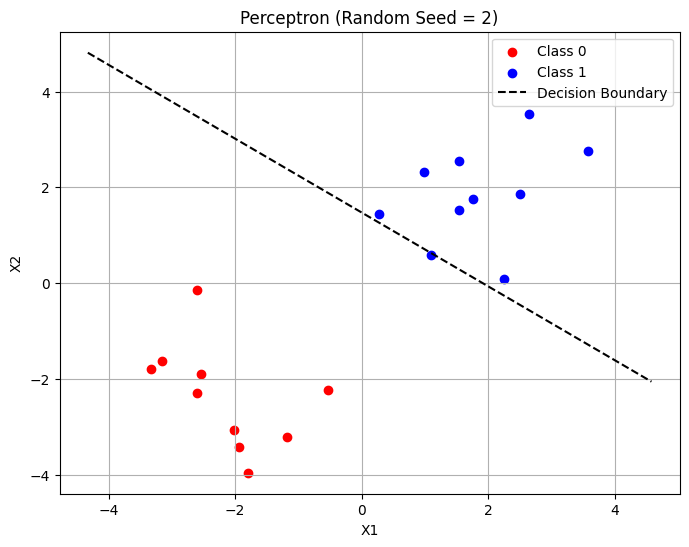

In [12]:
# Question 7

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("A4_P1.csv")  # Replace with full path if needed
X = df[['X1', 'X2']].values
y = df['y'].values

# Step activation function
def step(x):
    return np.where(x >= 0, 1, 0)

# Perceptron training function
def train_perceptron(X, y, lr=0.01, epochs=20, seed=None):
    if seed is not None:
        np.random.seed(seed)
    weights = np.random.randn(X.shape[1])
    bias = np.random.randn()
    for _ in range(epochs):
        for i in range(len(X)):
            z = np.dot(X[i], weights) + bias
            y_pred = step(z)
            error = y[i] - y_pred
            weights += lr * error * X[i]
            bias += lr * error
    return weights, bias

# Plot decision boundary
def plot_decision_boundary(X, y, weights, bias, title):
    plt.figure(figsize=(8, 6))
    # Plot data points
    plt.scatter(X[y==0][:, 0], X[y==0][:, 1], color='red', label='Class 0')
    plt.scatter(X[y==1][:, 0], X[y==1][:, 1], color='blue', label='Class 1')

    # Plot decision boundary
    x_vals = np.linspace(X[:, 0].min()-1, X[:, 0].max()+1, 100)
    y_vals = -(weights[0] * x_vals + bias) / weights[1]
    plt.plot(x_vals, y_vals, 'k--', label='Decision Boundary')

    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.title(title)
    plt.legend()
    plt.grid(True)
    plt.show()

# Run with different random seeds
seeds = [0, 1, 2]
for i, seed in enumerate(seeds):
    w, b = train_perceptron(X, y, lr=0.01, epochs=20, seed=seed)
    plot_decision_boundary(X, y, w, b, f'Perceptron (Random Seed = {seed})')


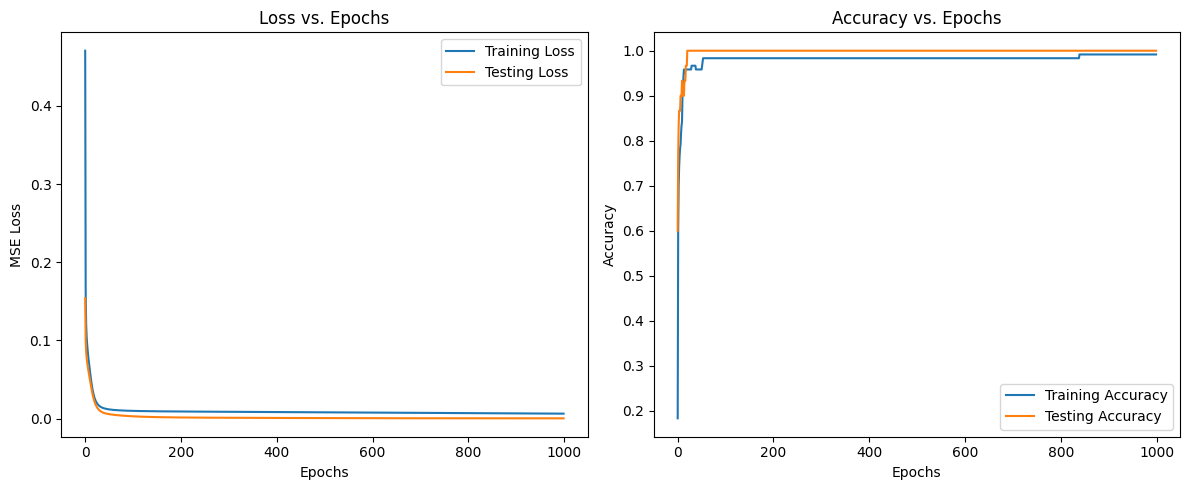

In [10]:
# Question 8

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# Set random seed for reproducibility
np.random.seed(42)

# Load and preprocess the data
iris = load_iris()
X = iris.data
y = iris.target.reshape(-1, 1)

# One-hot encode the labels
encoder = OneHotEncoder(sparse_output=False)
y_onehot = encoder.fit_transform(y)

# Standardize features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y_onehot, test_size=0.2, random_state=42)

# Activation functions and derivatives
def tanh(x):
    return np.tanh(x)

def tanh_derivative(x):
    return 1.0 - np.tanh(x)**2

def softmax(x):
    exps = np.exp(x - np.max(x, axis=1, keepdims=True))
    return exps / np.sum(exps, axis=1, keepdims=True)

# Loss function: Mean Squared Error
def mse(y_true, y_pred):
    return np.mean((y_true - y_pred)**2)

def mse_derivative(y_true, y_pred):
    return y_pred - y_true

# Initialize parameters
input_size = X_train.shape[1]
hidden_size = 5
output_size = y_train.shape[1]
learning_rate = 0.01
epochs = 1000

W1 = np.random.randn(input_size, hidden_size)
b1 = np.zeros((1, hidden_size))
W2 = np.random.randn(hidden_size, output_size)
b2 = np.zeros((1, output_size))

# Store losses and accuracies
train_losses = []
test_losses = []
train_accuracies = []
test_accuracies = []

# Training loop
for epoch in range(epochs):
    # Forward pass
    z1 = np.dot(X_train, W1) + b1
    a1 = tanh(z1)
    z2 = np.dot(a1, W2) + b2
    y_pred_train = softmax(z2)

    # Compute loss and accuracy
    loss_train = mse(y_train, y_pred_train)
    train_losses.append(loss_train)
    acc_train = np.mean(np.argmax(y_pred_train, axis=1) == np.argmax(y_train, axis=1))
    train_accuracies.append(acc_train)

    # Backpropagation
    d_loss = mse_derivative(y_train, y_pred_train)
    d_z2 = d_loss  # derivative of softmax + MSE
    d_W2 = np.dot(a1.T, d_z2)
    d_b2 = np.sum(d_z2, axis=0, keepdims=True)

    d_a1 = np.dot(d_z2, W2.T)
    d_z1 = d_a1 * tanh_derivative(z1)
    d_W1 = np.dot(X_train.T, d_z1)
    d_b1 = np.sum(d_z1, axis=0, keepdims=True)

    # Update weights and biases
    W1 -= learning_rate * d_W1
    b1 -= learning_rate * d_b1
    W2 -= learning_rate * d_W2
    b2 -= learning_rate * d_b2

    # Evaluate on test set
    a1_test = tanh(np.dot(X_test, W1) + b1)
    y_pred_test = softmax(np.dot(a1_test, W2) + b2)
    loss_test = mse(y_test, y_pred_test)
    test_losses.append(loss_test)
    acc_test = np.mean(np.argmax(y_pred_test, axis=1) == np.argmax(y_test, axis=1))
    test_accuracies.append(acc_test)

# Plot Loss
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(train_losses, label='Training Loss')
plt.plot(test_losses, label='Testing Loss')
plt.xlabel('Epochs')
plt.ylabel('MSE Loss')
plt.title('Loss vs. Epochs')
plt.legend()

# Plot Accuracy
plt.subplot(1, 2, 2)
plt.plot(train_accuracies, label='Training Accuracy')
plt.plot(test_accuracies, label='Testing Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Epochs')
plt.legend()

plt.tight_layout()
plt.show()